<a href="https://colab.research.google.com/github/zahrababacar6c/Prediction-du-Diabete/blob/main/Covid_19_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Covid-19 Pre-existing Medical Condition Analysis using Plotly Express, Choropleth maps and WordCloud Text Visualization

In [ ]:
## Switch to GPU mode for faster Computation (Runtime> Change runtime> GPU)

##Task 1 : Importing all the necessary libraries

In [4]:
import pandas as pd       #Data analysis and Manipulation
import plotly.express as px    #Data Visualization (one line of code for one graph)
import matplotlib.pyplot as plt   #Data Visualization for WordCloud
from wordcloud import WordCloud   #Wordcloud Text Visualization


In [5]:
import plotly.io as pio
pio.renderers.default = 'colab'     # To initialize plotly (default mode of plotly if OFF as it consumes a lot of space)

##Task 2 : Importing the dataset and Visualizing it (Dataset 1 : Worldometer dataset)

In [7]:
df_worldometer = pd.read_csv('/content/covid_worldometer_data.csv')
df_worldometer.head()

,S.no,Country,TotalCases,TotalDeaths,Total Recovered,Active cases,Totalcases/1M,TotalDeath/1M,iso_alpha
0,1,USA,"23,848,410","397,994","14,112,119","9,338,297","71,822","1,199",USA
1,2,India,"10,528,508","151,954","10,162,738","213,816","7,589",110,IND
2,3,Brazil,"8,326,115","207,160","7,339,703","779,252","39,021",971,BRA
3,4,Russia,"3,495,816","63,940","2,882,044","549,832","23,949",438,RUS
4,5,UK,"3,260,258","86,015","1,406,967","1,767,276","47,890","1,263",UKR


In [8]:
df_worldometer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   S.no             221 non-null    int64 
 1   Country          221 non-null    object
 2   TotalCases       221 non-null    object
 3   TotalDeaths      221 non-null    object
 4   Total Recovered  217 non-null    object
 5   Active cases     218 non-null    object
 6   Totalcases/1M    219 non-null    object
 7   TotalDeath/1M    200 non-null    object
 8   iso_alpha        221 non-null    object
dtypes: int64(1), object(8)
memory usage: 15.7+ KB


In [9]:
df_worldometer.isna().sum()

,0
S.no,0
Country,0
TotalCases,0
TotalDeaths,0
Total Recovered,4
Active cases,3
Totalcases/1M,2
TotalDeath/1M,21
iso_alpha,0


In [14]:
px.bar(df_worldometer.head(15),x= "Country",y="TotalCases",color="TotalCases")

In [15]:
px.bar(df_worldometer.head(15),x= "Country",y="TotalDeaths",color="TotalDeaths")

In [17]:
df_worldometer.columns

Index(['S.no', 'Country', 'TotalCases', 'TotalDeaths', 'Total Recovered',
       'Active cases', 'Totalcases/1M', 'TotalDeath/1M', 'iso_alpha'],
      dtype='object')

In [23]:
px.scatter(df_worldometer,x="Totalcases/1M",y="TotalDeath/1M",color="Country")

##Task 3: Geographic Visualization using Choropleth maps

In [ ]:
# A choropleth map displays divided geographical areas or regions that are coloured, shaded or patterned in relation to a data variable.
#Amazing Representation of data in a map . Choropleth maps provide an easy way to visualize how a measurement varies across a geographic area.

#Dataset 1
#parameters= dataset, locations= ISOALPHA, color, hover_name, color_continuous_scale= [RdYlGn, Blues, Viridis...],
#

In [24]:
df_worldometer.columns

Index(['S.no', 'Country', 'TotalCases', 'TotalDeaths', 'Total Recovered',
       'Active cases', 'Totalcases/1M', 'TotalDeath/1M', 'iso_alpha'],
      dtype='object')

In [28]:
px.choropleth(df_worldometer,
              locations= 'iso_alpha',
              hover_name='TotalDeath/1M',
              projection='orthographic',
              color_continuous_scale='Viridis')

In [30]:
px.choropleth(df_worldometer,
              locations= 'iso_alpha',
              hover_name='TotalDeath/1M',
              scope='africa',
              color_continuous_scale='Viridis')

##Task 4: Importing and Analyzing the dataset(Dataset 2: Covid-19 Pre-existing condition Medical dataset; source: CDC,US)

In [33]:
df_medical = pd.read_csv('/content/US_medical_data.csv')
df_medical.head()

,Data as of,Start Week,End Week,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
0,1/10/2021,1/4/2020,1/9/2021,US,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,198.0,205.0,NaN
1,1/10/2021,1/4/2020,1/9/2021,US,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,968.0,985.0,NaN
2,1/10/2021,1/4/2020,1/9/2021,US,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,2537.0,2584.0,NaN
3,1/10/2021,1/4/2020,1/9/2021,US,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,7369.0,7555.0,NaN
4,1/10/2021,1/4/2020,1/9/2021,US,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,18378.0,18829.0,NaN


In [35]:
df_medical.groupby('State').count()

,Data as of,Start Week,End Week,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
State,,,,,,,,,,
AK,230,230,230,230,230,230,230,128,128,102
AL,230,230,230,230,230,230,230,186,189,44
AR,230,230,230,230,230,230,230,185,186,45
AZ,230,230,230,230,230,230,230,195,197,35
CA,230,230,230,230,230,230,230,209,210,21
CO,230,230,230,230,230,230,230,178,181,52
CT,230,230,230,230,230,230,230,181,183,49
DC,230,230,230,230,230,230,230,164,165,66
DE,230,230,230,230,230,230,230,140,142,90


In [37]:
df_medical.groupby('Condition Group').count()

,Data as of,Start Week,End Week,State,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
Condition Group,,,,,,,,,,
All other conditions and causes (residual),540,540,540,540,540,540,540,460,485,80
Alzheimer disease,540,540,540,540,540,540,540,459,459,81
COVID-19,540,540,540,540,540,540,540,481,481,59
Circulatory diseases,3780,3780,3780,3780,3780,3780,3780,2889,2897,891
Diabetes,540,540,540,540,540,540,540,437,437,103
"Intentional and unintentional injury, poisoning, and other adverse events",540,540,540,540,540,540,540,353,412,187
Malignant neoplasms,540,540,540,540,540,540,540,394,398,146
Obesity,540,540,540,540,540,540,540,372,372,168
Renal failure,540,540,540,540,540,540,540,420,422,120


In [38]:
df_medical.groupby('Condition').count()

,Data as of,Start Week,End Week,State,Condition Group,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
Condition,,,,,,,,,,
Adult respiratory distress syndrome,540,540,540,540,540,540,540,423,423,117
All other conditions and causes (residual),540,540,540,540,540,540,540,460,485,80
Alzheimer disease,540,540,540,540,540,540,540,459,459,81
COVID-19,540,540,540,540,540,540,540,481,481,59
Cardiac arrest,540,540,540,540,540,540,540,418,418,122
Cardiac arrhythmia,540,540,540,540,540,540,540,403,403,137
Cerebrovascular diseases,540,540,540,540,540,540,540,406,406,134
Chronic lower respiratory diseases,540,540,540,540,540,540,540,422,423,118
Diabetes,540,540,540,540,540,540,540,437,437,103


In [39]:
df_medical.groupby('Age Group').count()

,Data as of,Start Week,End Week,State,Condition Group,Condition,ICD10_codes,COVID-19 Deaths,Number of Mentions,Flag
Age Group,,,,,,,,,,
0-24,1242,1242,1242,1242,1242,1242,1242,804,812,438
25-34,1242,1242,1242,1242,1242,1242,1242,654,670,588
35-44,1242,1242,1242,1242,1242,1242,1242,679,700,563
45-54,1242,1242,1242,1242,1242,1242,1242,816,837,426
55-64,1242,1242,1242,1242,1242,1242,1242,960,971,282
65-74,1242,1242,1242,1242,1242,1242,1242,1081,1092,161
75-84,1242,1242,1242,1242,1242,1242,1242,1126,1131,116
85+,1242,1242,1242,1242,1242,1242,1242,1101,1108,141
All Ages,1242,1242,1242,1242,1242,1242,1242,1203,1206,39


##Task 5: Visualizing the Pre-existing condition Medical dataset

In [41]:
df_medical.State.unique()

array(['US', 'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL',
       'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD',
       'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM',
       'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN',
       'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY', 'YC', 'PR'],
      dtype=object)

In [42]:
df_medical_US = df_medical[df_medical['State'] == 'US']
df_medical_US.head()

,Data as of,Start Week,End Week,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
0,1/10/2021,1/4/2020,1/9/2021,US,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,198.0,205.0,NaN
1,1/10/2021,1/4/2020,1/9/2021,US,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,968.0,985.0,NaN
2,1/10/2021,1/4/2020,1/9/2021,US,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,2537.0,2584.0,NaN
3,1/10/2021,1/4/2020,1/9/2021,US,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,7369.0,7555.0,NaN
4,1/10/2021,1/4/2020,1/9/2021,US,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,18378.0,18829.0,NaN


In [43]:
px.bar(df_medical,x='Age Group',y='COVID-19 Deaths',color='Condition', hover_name='Condition',log_y=True)

In [46]:
px.bar(df_medical_US,x='Age Group',y='COVID-19 Deaths',color='Condition Group', hover_name='Condition Group')

In [62]:
df_medical_US_All_age = df_medical[(df_medical["State"]=="US") & (df_medical["Age Group"]=="All Ages")]
df_medical_US_All_age.head()

,Data as of,Start Week,End Week,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
9,1/10/2021,1/4/2020,1/9/2021,US,Respiratory diseases,Influenza and pneumonia,J09-J18,All Ages,139430.0,141763.0,NaN
19,1/10/2021,1/4/2020,1/9/2021,US,Respiratory diseases,Chronic lower respiratory diseases,J40-J47,All Ages,28359.0,29326.0,NaN
29,1/10/2021,1/4/2020,1/9/2021,US,Respiratory diseases,Adult respiratory distress syndrome,J80,All Ages,36915.0,36915.0,NaN
39,1/10/2021,1/4/2020,1/9/2021,US,Respiratory diseases,Respiratory failure,J96,All Ages,114543.0,117102.0,NaN
49,1/10/2021,1/4/2020,1/9/2021,US,Respiratory diseases,Respiratory arrest,R09.2,All Ages,6727.0,6727.0,NaN


In [63]:
px.bar(df_medical_US_All_age,x='Condition Group',y='COVID-19 Deaths',color='COVID-19 Deaths', hover_name='Condition')

In [64]:
df_med_IPN = df_medical[(df_medical["Condition"]=="Influenza and pneumonia") & (df_medical["Age Group"]=="All Ages")]
df_med_IPN.head()

,Data as of,Start Week,End Week,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
9,1/10/2021,1/4/2020,1/9/2021,US,Respiratory diseases,Influenza and pneumonia,J09-J18,All Ages,139430.0,141763.0,NaN
239,1/10/2021,1/4/2020,1/9/2021,AL,Respiratory diseases,Influenza and pneumonia,J09-J18,All Ages,1734.0,1755.0,NaN
469,1/10/2021,1/4/2020,1/9/2021,AK,Respiratory diseases,Influenza and pneumonia,J09-J18,All Ages,86.0,90.0,NaN
699,1/10/2021,1/4/2020,1/9/2021,AZ,Respiratory diseases,Influenza and pneumonia,J09-J18,All Ages,4171.0,4239.0,NaN
929,1/10/2021,1/4/2020,1/9/2021,AR,Respiratory diseases,Influenza and pneumonia,J09-J18,All Ages,1393.0,1408.0,NaN


In [65]:
px.bar(df_med_IPN,x='State',y='COVID-19 Deaths',color='COVID-19 Deaths',log_y=True)

##Task 6: WordCloud Text Visualization

In [66]:
#Step a= Convert the columns with conditions and condition group into list using tolist() function
#Step b= Convert the list to one single string
#Step c= Convert the string into WordCloud
# WordCloud imported in task 1. # WordCloud visualization needs matplotlib

###WordCloud 1- Condition group

In [81]:
list1 =df_medical_US_All_age["Condition Group"].tolist()

In [84]:
String1 = "".join(list1)

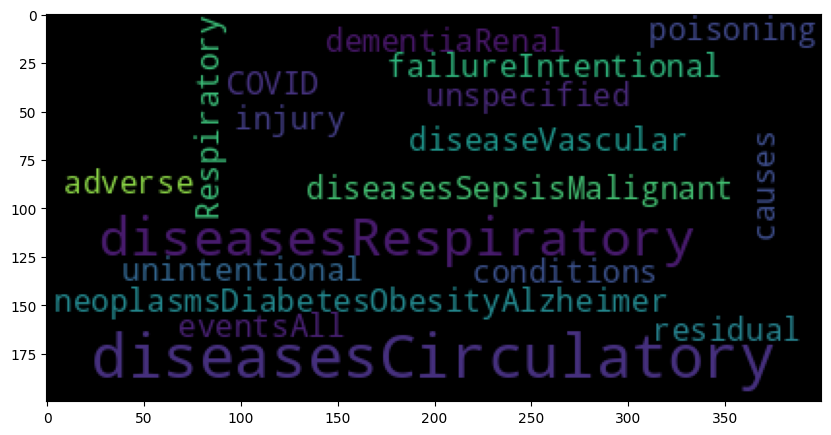

In [85]:
plt.figure(figsize=(10,10))
plt.imshow(WordCloud().generate(String1))
plt.show()

###WordCloud 2- Conditions

In [71]:
list2 =df_medical_US_All_age['Condition'].tolist()

In [90]:
String2 = ' '.join(list2)

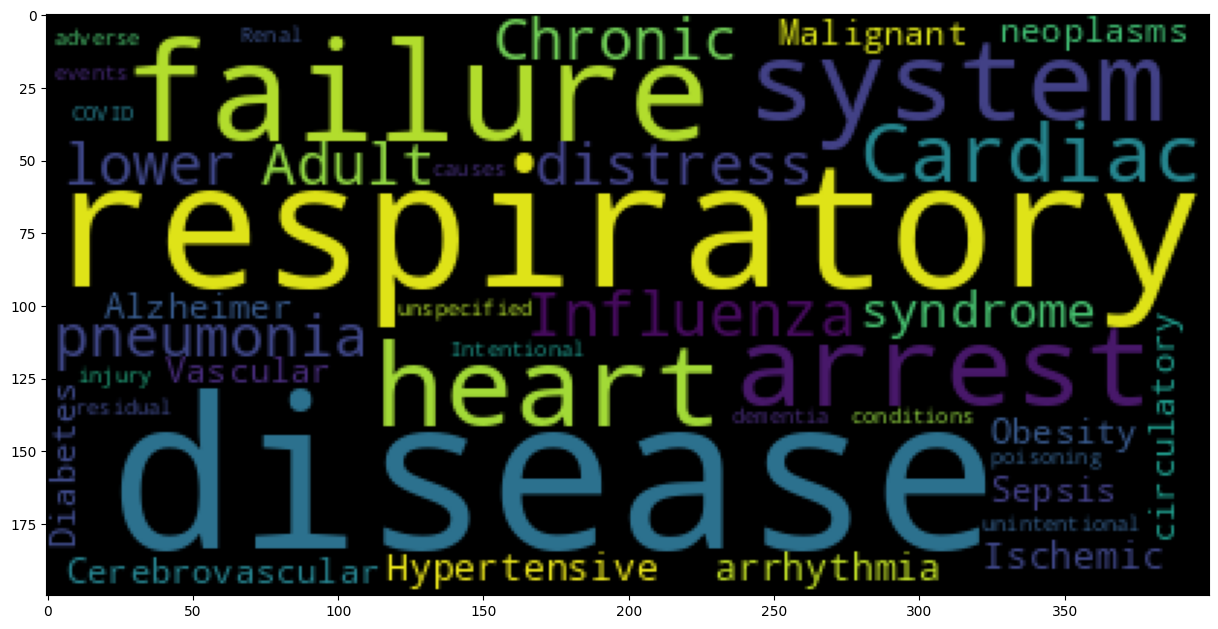

In [91]:
plt.figure(figsize=(15,15))
plt.imshow(WordCloud().generate(String2))
plt.show()